In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
from model import *
from tqdm import tqdm

# Linear Regression — Assignment 1

## Please read the instructions below:

In this assignment, you are supposed to implement the empty code snippets in model.py file. Those functions shall be used in this notebook to fit different kinds of data. For this assignment, we have three kinds of Data. These are:
    1. Linear Data.
    2. Polynomial Data.
    3. Function of Linear and Periodic Data.
    
You are also supposed to choose the correct set of hyperparameters(learning rate, epochs etc.) for each type of data fit which shall be recorded and counted for your final evaluation on our private test data. 

Don't change any other part of the code except for the part we explicitly allow for. Doing so might introduce difficultiles for the evaluation on our side and might also affect your models performance.

Make sure you have implemented all the functions in the model.py file. Running this notebook's cell without implementing them will give errors.     

## 1. Linear Data with Linear Features

In the first data fitting part, we have a set of data points in 2d space to which we shall try to fit a linear line and check the model's performance of test data.

100%|██████████| 1000/1000 [00:00<00:00, 28131.19it/s]


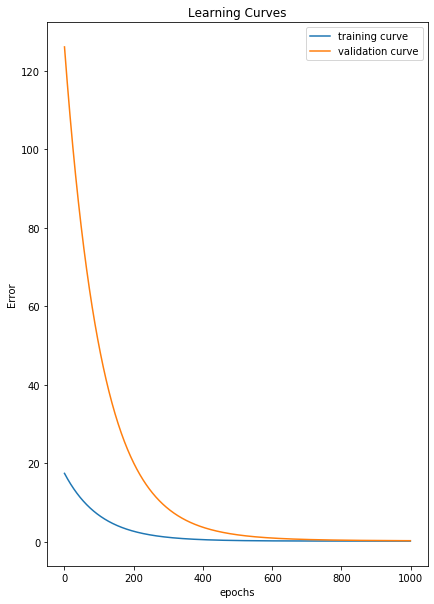

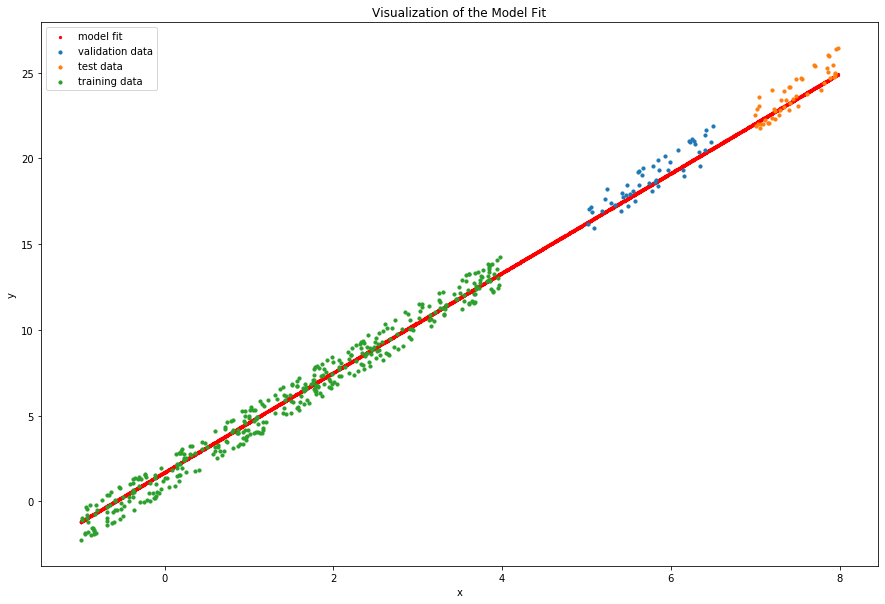

Final Validation Loss is:0.29397399659567935
Test Loss is:0.27047633780776165


In [13]:
Data_choice = 'linear'
Feature_choice = 'linear'
TRAIN_LOSS = []
VAL_LOSS = []
features = 2

#######################################################################
# YOU CAN ADJUST THE FOLLOWING 3 PARAMETERS ACCORDING TO YOUR CHOICE. #

Epochs = 1000
lr = 0.001
weight_init = 'random' ## this can be either 'random' or 'zeros'

# DON'T CHANGE ANY PART OF THE CODE IN THIS CELL BELOW THIS LINE. #
###################################################################

# Load data
x_train, y_train, x_val, y_val, x_test, y_test = utils.generate_data(Data_choice, -1, 4, 400, 5, 6.5, 50, 7, 8, 50)
min_x = min(x_train + x_val + x_test)
max_x = max(x_train + x_val + x_test)

# Convert data to numpy arrays and reshape into required shapes.
x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
x_val, y_val = np.array(x_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1)
x_test, y_test = np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Make features from the data points
train_feat = get_features(data = x_train, data_type=Feature_choice)
val_feat = get_features(data = x_val, data_type=Feature_choice)
test_feat = get_features(data = x_test, data_type=Feature_choice)

# Initialise the Linear Regression Model.
model = Model(lr=lr, feature_size=features, init=weight_init)

for epoch in tqdm(range(Epochs)):
    
    # prediction and loss on training data
    y_pred = model.forward(train_feat)
    train_loss = model.loss(y_pred, y_train)
    TRAIN_LOSS.append(train_loss)
    
    # prediction and loss on validation data
    y_val_pred = model.forward(val_feat)
    val_loss = model.loss(y_val_pred, y_val)
    VAL_LOSS.append(val_loss)
    
    # backward pass to train the model and adjust weights with Gradient Descent.
    model.backward(y_pred, y_train, train_feat)


x_pred = np.array(utils.get_x_data(min_x, max_x, 5000)).reshape(-1, 1)
pred_feat = get_features(data = x_pred, data_type=Feature_choice)
y_pred =  model.forward(pred_feat)

# prediction and loss on test data
y_test_pred = model.forward(test_feat)
test_loss = model.loss(y_test_pred, y_test)

utils.plot(TRAIN_LOSS, VAL_LOSS, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print("Final Validation Loss is:" + str(val_loss))
print("Test Loss is:" + str(test_loss))

# save your tuned hyper-parameters
utils.save_hyper(Data_choice, Feature_choice, features,Epochs, lr, weight_init)

## 2. Polynomial Data with Linear Features

In this part, we again have a set of data points in 2d space to which we shall try to fit a linear line and check the model's performance of test data.

100%|██████████| 5000/5000 [00:00<00:00, 22068.38it/s]


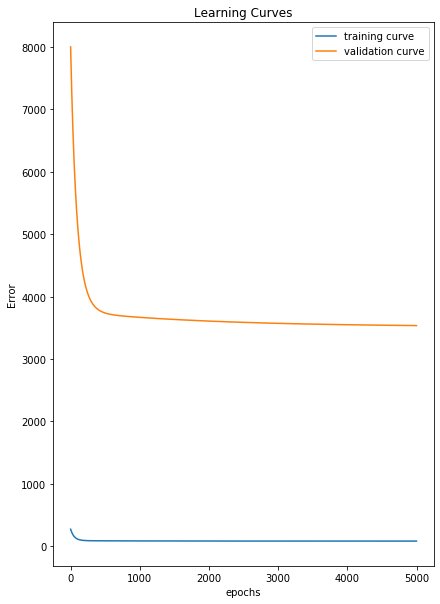

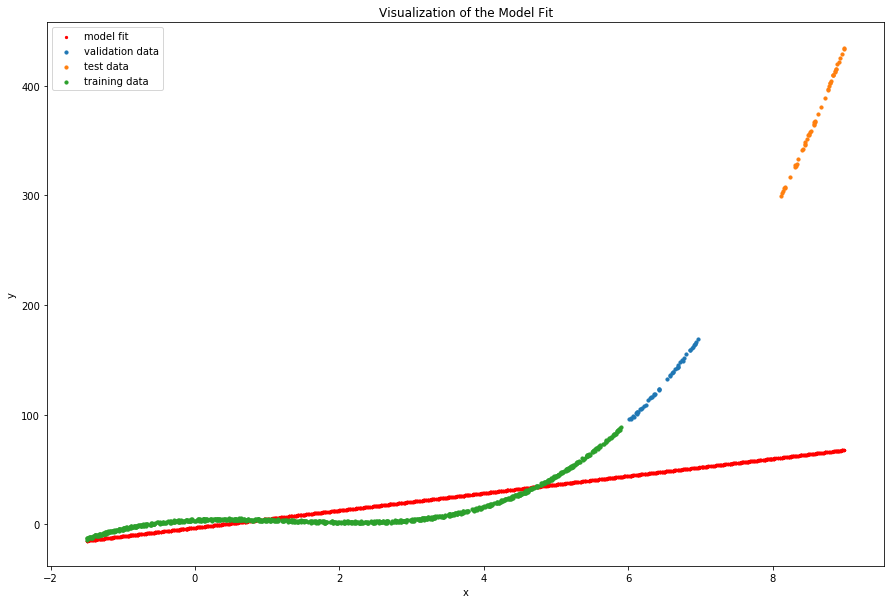

Final Validation Loss is:3534.1759689130345
Test Loss is:47147.749242188765


In [4]:
Data_choice = 'poly'
Feature_choice = 'linear'
TRAIN_LOSS = []
VAL_LOSS = []
features = 2

#######################################################################
# YOU CAN ADJUST THE FOLLOWING 3 PARAMETERS ACCORDING TO YOUR CHOICE. #

Epochs = 5000
lr = 0.001
weight_init = 'random' ## this can be either 'random' or 'zeros'

# DON'T CHANGE ANY PART OF THE CODE IN THIS CELL BELOW THIS LINE. #
###################################################################

# Load Data
x_train, y_train, x_val, y_val, x_test, y_test = utils.generate_data(Data_choice, -1.5, 5.9, 1000, 6, 7, 50, 8, 9, 50)
min_x = min(x_train + x_val + x_test)
max_x = max(x_train + x_val + x_test)

# Convert data to numpy arrays and reshape into required shapes.
x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
x_val, y_val = np.array(x_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1)
x_test, y_test = np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Make features from the data points
train_feat = get_features(data = x_train, data_type=Feature_choice)
val_feat = get_features(data = x_val, data_type=Feature_choice)
test_feat = get_features(data = x_test, data_type=Feature_choice)

# Initialise the Linear Regression Model.
model = Model(lr=lr, feature_size=features, init=weight_init)

for epoch in tqdm(range(Epochs)):
    
    # prediction and loss on training data
    y_pred = model.forward(train_feat)
    train_loss = model.loss(y_pred, y_train)
    
    TRAIN_LOSS.append(train_loss)
    
    # prediction and loss on validation data
    y_val_pred = model.forward(val_feat)
    val_loss = model.loss(y_val_pred, y_val)
    VAL_LOSS.append(val_loss)
    
    # backward pass to train the model and adjust weights with Gradient Descent.
    model.backward(y_pred, y_train, train_feat)

x_pred = np.array(utils.get_x_data(min_x, max_x, 5000)).reshape(-1, 1)
pred_feat = get_features(data = x_pred, data_type=Feature_choice)
y_pred =  model.forward(pred_feat)

# prediction and loss on test data
y_test_pred = model.forward(test_feat)
test_loss = model.loss(y_test_pred, y_test)

utils.plot(TRAIN_LOSS, VAL_LOSS, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print("Final Validation Loss is:" + str(val_loss))
print("Test Loss is:" + str(test_loss))

# save your tuned hyper-parameters
utils.save_hyper(Data_choice, Feature_choice, features, Epochs, lr, weight_init)

## 3. Polynomial Data with Polynomial Features

In this, we shall try to fit the data with polynomial features on the data in the above cell. 

100%|██████████| 50000/50000 [00:08<00:00, 6056.40it/s]


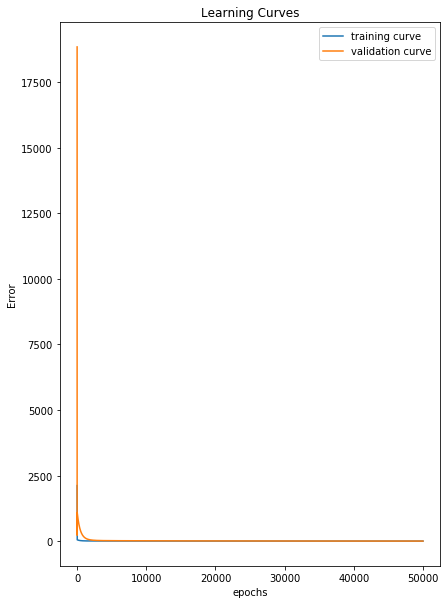

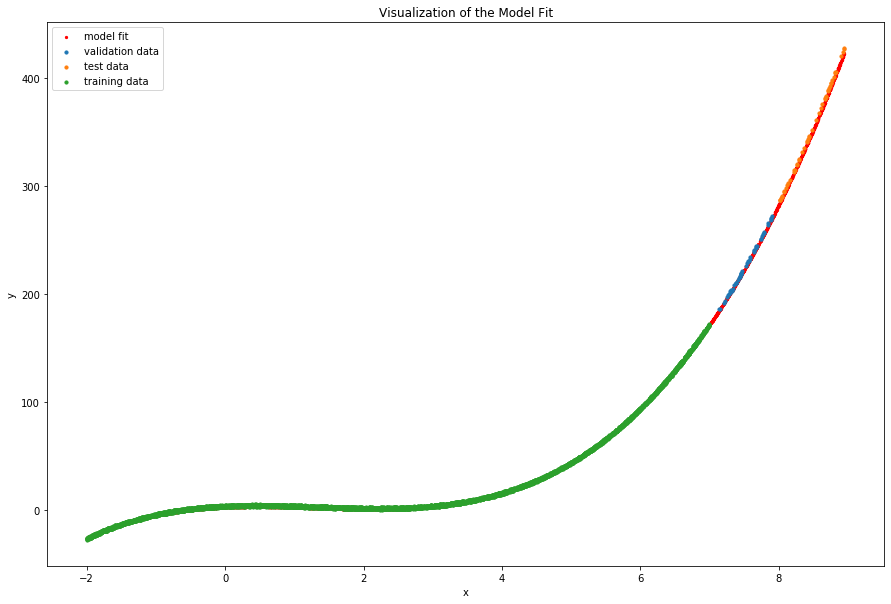

Final Validation Loss is:1.0370194222232516
Test Loss is:4.7241940754195


In [5]:
Data_choice = 'poly'
Feature_choice = 'poly'
TRAIN_LOSS = []
VAL_LOSS = []
features = 4

#######################################################################
# YOU CAN ADJUST THE FOLLOWING 3 PARAMETERS ACCORDING TO YOUR CHOICE. #

Epochs = 50000
lr = 0.0001
weight_init = 'random' ## this can be either 'random' or 'zeros'

# DON'T CHANGE ANY PART OF THE CODE IN THIS CELL BELOW THIS LINE. #
###################################################################

# Load Data
x_train, y_train, x_val, y_val, x_test, y_test = utils.generate_data(Data_choice, -2, 7, 5000, 7.1, 7.9, 50, 8, 9, 50)
min_x = min(x_train + x_val + x_test)
max_x = max(x_train + x_val + x_test)

# Convert data to numpy arrays and reshape into required shapes.
x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
x_val, y_val = np.array(x_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1)
x_test, y_test = np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Make features from the data points
train_feat = get_features(data = x_train, data_type=Feature_choice)
val_feat = get_features(data = x_val, data_type=Feature_choice)
test_feat = get_features(data = x_test, data_type=Feature_choice)

# Initialise the Linear Regression Model.
model = Model(lr=lr, feature_size=features, init=weight_init)

for epoch in tqdm(range(Epochs)):
    
    # prediction and loss on training data
    y_pred = model.forward(train_feat)
    train_loss = model.loss(y_pred, y_train)
    
    TRAIN_LOSS.append(train_loss)
    
    # prediction and loss on validation data
    y_val_pred = model.forward(val_feat)
    val_loss = model.loss(y_val_pred, y_val)
    VAL_LOSS.append(val_loss)
    
    # backward pass to train the model and adjust weights with Gradient Descent.
    model.backward(y_pred, y_train, train_feat)

    
x_pred = np.array(utils.get_x_data(min_x, max_x, 5000)).reshape(-1, 1)
pred_feat = get_features(data = x_pred, data_type=Feature_choice)
y_pred =  model.forward(pred_feat)

# prediction and loss on test data
y_test_pred = model.forward(test_feat)
test_loss = model.loss(y_test_pred, y_test)

utils.plot(TRAIN_LOSS, VAL_LOSS, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print("Final Validation Loss is:" + str(val_loss))
print("Test Loss is:" + str(test_loss))

# save your tuned hyper-parameters
utils.save_hyper(Data_choice, Feature_choice, features, Epochs, lr, weight_init)

## 4. Linear Periodic Data with Linear Features

Data in this is generated as a function of x, sinx and cosx. In this part, we shall try to fit this data with linear features only.

100%|██████████| 1000/1000 [00:00<00:00, 25522.42it/s]


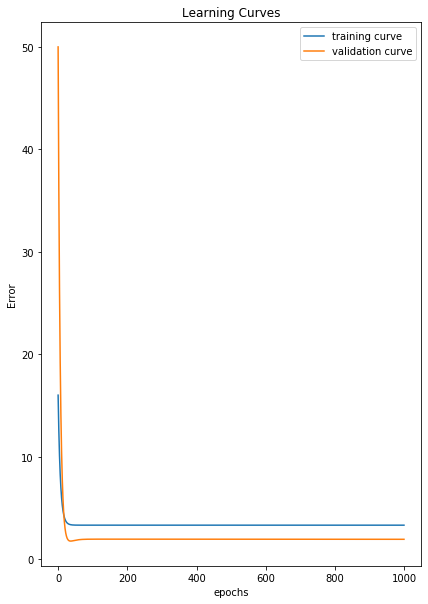

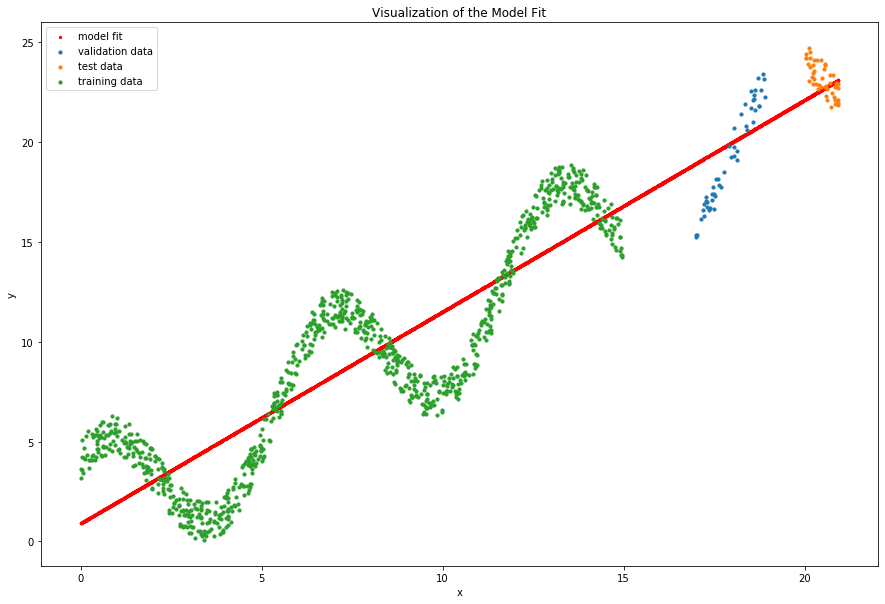

Final Validation Loss is:1.9338515180275158
Test Loss is:0.6483963352477697


In [6]:
Data_choice = 'linear_periodic'
Feature_choice = 'linear'
TRAIN_LOSS = []
VAL_LOSS = []
features = 2

#######################################################################
# YOU CAN ADJUST THE FOLLOWING 3 PARAMETERS ACCORDING TO YOUR CHOICE. #

Epochs = 1000
lr = 0.001
weight_init = 'random' ## this can be either 'random' or 'zeros'

# DON'T CHANGE ANY PART OF THE CODE IN THIS CELL BELOW THIS LINE. #
###################################################################

# Load Data
x_train, y_train, x_val, y_val, x_test, y_test = utils.generate_data(Data_choice, 0, 15, 1000, 17, 19, 50, 20, 21, 50)
min_x = min(x_train + x_val + x_test)
max_x = max(x_train + x_val + x_test)

# Convert data to numpy arrays and reshape into required shapes.
x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
x_val, y_val = np.array(x_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1)
x_test, y_test = np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Make features from the data points
train_feat = get_features(data = x_train, data_type=Feature_choice)
val_feat = get_features(data = x_val, data_type=Feature_choice)
test_feat = get_features(data = x_test, data_type=Feature_choice)

# Initialise the Linear Regression Model.
model = Model(lr=lr, feature_size=features, init=weight_init)

for epoch in tqdm(range(Epochs)):
    
    # prediction and loss on training data
    y_pred = model.forward(train_feat)
    train_loss = model.loss(y_pred, y_train)
    TRAIN_LOSS.append(train_loss)
    
    # prediction and loss on validation data
    y_val_pred = model.forward(val_feat)
    val_loss = model.loss(y_val_pred, y_val)
    VAL_LOSS.append(val_loss)
    
    # backward pass to train the model and adjust weights with Gradient Descent.
    model.backward(y_pred, y_train, train_feat)

x_pred = np.array(utils.get_x_data(min_x, max_x, 5000)).reshape(-1, 1)
pred_feat = get_features(data = x_pred, data_type=Feature_choice)
y_pred =  model.forward(pred_feat)

# prediction and loss on test data
y_test_pred = model.forward(test_feat)
test_loss = model.loss(y_test_pred, y_test)

utils.plot(TRAIN_LOSS, VAL_LOSS, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print("Final Validation Loss is:" + str(val_loss))
print("Test Loss is:" + str(test_loss))

# save your tuned hyper-parameters
utils.save_hyper(Data_choice, Feature_choice, features, Epochs, lr, weight_init)

## 5. Linear Periodic Data with Linear Periodic Features

In this part, we shall fit the same data as above with Linear and Periodic Features.

100%|██████████| 50000/50000 [00:01<00:00, 28788.94it/s]


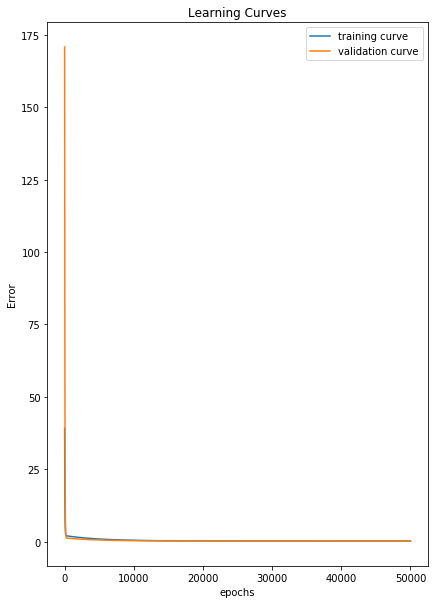

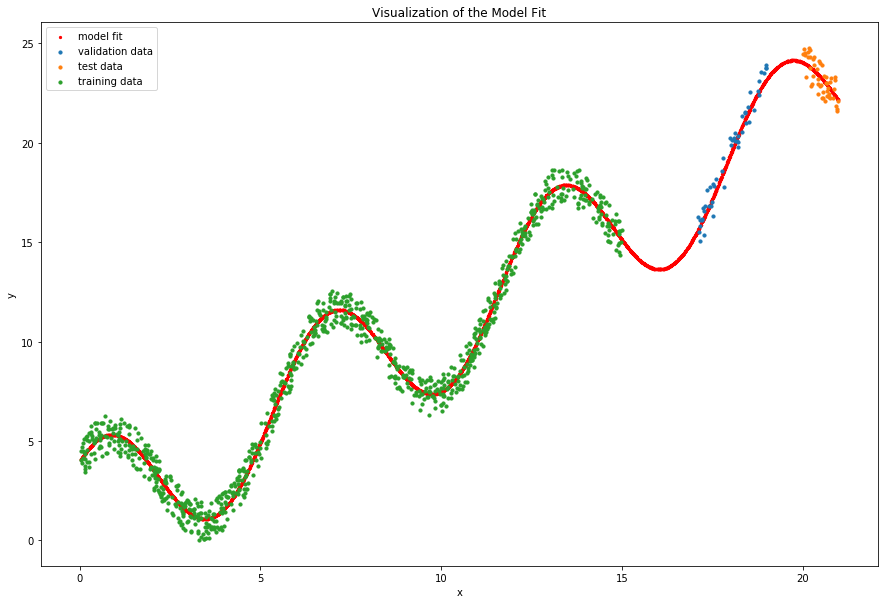

Final Validation Loss is:0.1442137372693867
Test Loss is:0.1670833599296391


In [7]:
Data_choice = 'linear_periodic'
Feature_choice = 'linear_periodic'
TRAIN_LOSS = []
VAL_LOSS = []
features = 4

#######################################################################
# YOU CAN ADJUST THE FOLLOWING 3 PARAMETERS ACCORDING TO YOUR CHOICE. #

Epochs = 50000
lr = 0.0002
weight_init = 'random' ## this can be either 'random' or 'zeros'

# DON'T CHANGE ANY PART OF THE CODE IN THIS CELL BELOW THIS LINE. #
###################################################################

# Load Data
x_train, y_train, x_val, y_val, x_test, y_test = utils.generate_data(Data_choice, 0, 15, 1000, 17, 19, 50, 20, 21, 50)
min_x = min(x_train + x_val + x_test)
max_x = max(x_train + x_val + x_test)

# Convert data to numpy arrays and reshape into required shapes.
x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
x_val, y_val = np.array(x_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1)
x_test, y_test = np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Make features from the data points
train_feat = get_features(data = x_train, data_type=Feature_choice)
val_feat = get_features(data = x_val, data_type=Feature_choice)
test_feat = get_features(data = x_test, data_type=Feature_choice)

# Initialise the Linear Regression Model.
model = Model(lr=lr, feature_size=features, init=weight_init)

for epoch in tqdm(range(Epochs)):
    
    # prediction and loss on training data
    y_pred = model.forward(train_feat)
    train_loss = model.loss(y_pred, y_train)
    
    TRAIN_LOSS.append(train_loss)
    
    # prediction and loss on validation data
    y_val_pred = model.forward(val_feat)
    val_loss = model.loss(y_val_pred, y_val)
    VAL_LOSS.append(val_loss)
    
    # backward pass to train the model and adjust weights according to GD.
    model.backward(y_pred, y_train, train_feat)

x_pred = np.array(utils.get_x_data(min_x, max_x, 5000)).reshape(-1, 1)
pred_feat = get_features(data = x_pred, data_type=Feature_choice)
y_pred =  model.forward(pred_feat)

# prediction and loss on test data
y_test_pred = model.forward(test_feat)
test_loss = model.loss(y_test_pred, y_test)

utils.plot(TRAIN_LOSS, VAL_LOSS, x_train, y_train, x_val, y_val, x_test, y_test, x_pred, y_pred)

print("Final Validation Loss is:" + str(val_loss))
print("Test Loss is:" + str(test_loss))

# save your tuned hyper-parameters
utils.save_hyper(Data_choice, Feature_choice, features, Epochs, lr, weight_init)